In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.describe

<bound method NDFrame.describe of        person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1      

In [4]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in data:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [6]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [7]:
# Splitting Data into X and Y variables
# X : Independent Variables

X = data.iloc[: , :-1]
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


In [8]:
# Y : Dependent Variable (here 'loan_status')

Y = data.iloc[: , -1]
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [9]:
# Splitting Data into train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [10]:
# Initialize and train the Tree Classifier

from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [12]:
# Make predictions on the test data

Y_pred = dtree.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[6734  243]
 [ 701 1322]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)

Accuracy: 0.8951111111111111
Precision: 0.8447284345047923
Recall: 0.6534849233811172


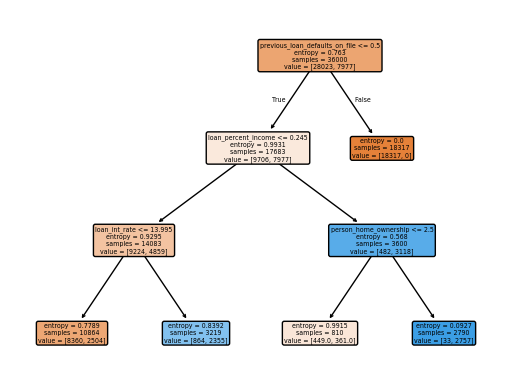

In [15]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = data.columns, 
                     filled = True , precision = 4, rounded = True)